In [6]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
!pip install wordcloud
from wordcloud import WordCloud
import urllib.request

In [9]:
url = "https://lazyprogrammer.me/course_files/spam.csv"
urllib.request.urlretrieve(url, "spam.csv")
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")  # encoding avoids errors
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
#drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3",  "Unnamed: 4"], axis =1)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#rename columns to sth better
df.columns = ["labels", "data"]

In [14]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

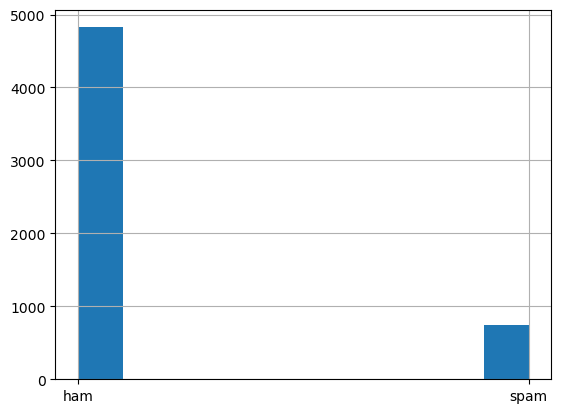

In [15]:
#a graphical representation of the distribution of a numerical dataset
df['labels'].hist()

In [16]:
#create binary labels
df['b_labels'] = df['labels'].map({'ham' : 0, 'spam' : 1})
Y = df['b_labels'].to_numpy()

In [17]:
#split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [18]:
featurizer = CountVectorizer(decode_error = 'ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [19]:
Xtrain

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 49549 stored elements and shape (3733, 7050)>

In [22]:
#create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train acc:", model.score(Xtrain, Ytrain))
print("test acc:", model.score(Xtest, Ytest))

train acc: 0.994106616662202
test acc: 0.9847743338771071


In [23]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1", f1_score(Ytrain, Ptrain))
print("test F1", f1_score(Ytest, Ptest))

train F1 0.9782178217821782
test F1 0.9401709401709402


In [24]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3217,    7],
       [  15,  494]])

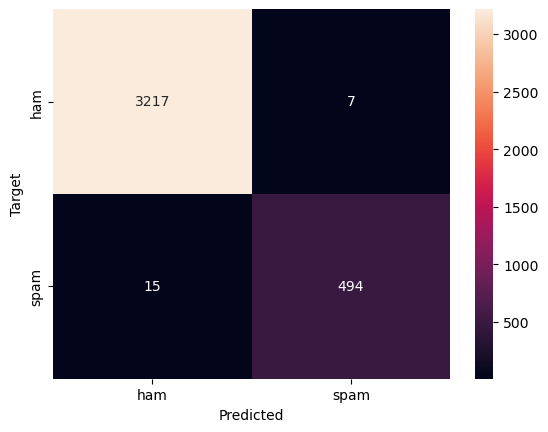

In [27]:
#making confusion matrix easy to read:
def plot_cm(cm):
    classes = ['ham', 'spam']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
plot_cm(cm)

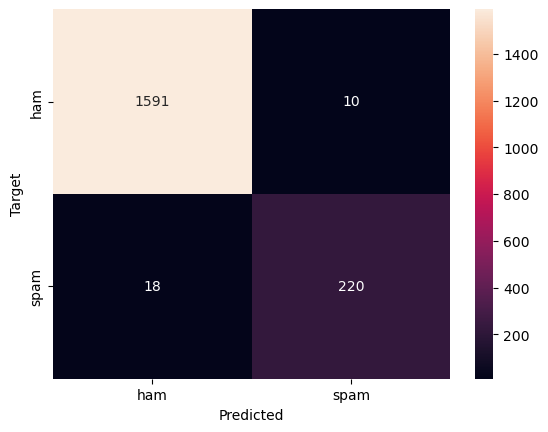

In [28]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)

In [30]:
#visualize the data
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis = ('off')
    plt.show()    

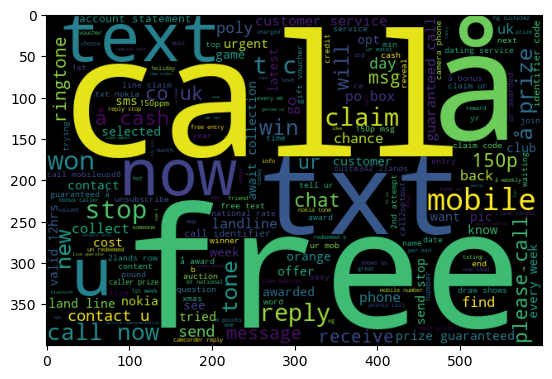

In [31]:
visualize('spam')

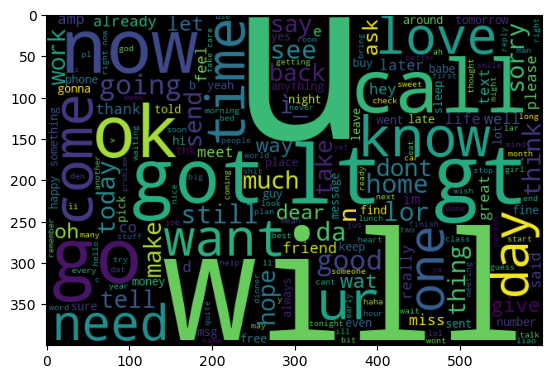

In [32]:
visualize('ham')

In [33]:
#see what we are getting wrong
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [35]:
#things that should be spam
#all messages that your model predicted as ham (0) & all messages that are actually spam (1)
#Which spam messages did my model fail to catch?
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP51FL
SMS. ac JSco: Energy is high, but u ma

In [37]:
#things that should not be spam, or maybe they are mislabelled
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)

Finally the match heading towards draw as your prediction.
Yes:)from last week itself i'm taking live call.
Waiting for your call.
26th OF JULY
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Glad to see your reply.
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
Received, understood n acted upon!
I liked the new mobile
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
